In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/339.csv', encoding= 'utf8')

In [0]:
df.head()

type  ...                                             review
0      White wine   ...                                     Ваще отличное!
1  Sparkling wine   ...                          Легкое, питкое. Просекко.
2  Sparkling wine   ...   3.3*. Ничего интересного. В апероль шпритс влил)
3  Sparkling wine   ...  Неплохое, фруктовое и питкое. Не могу сказать,...
4  Sparkling wine   ...                   просекко, каким он и должен быть

[5 rows x 10 columns]

In [0]:
df.iloc[9603]

type                                                           Wine 
country                                                       Cyprus
region                                                 Troodos South
winery                                                        Amfora
name                             Cobihbйoh Bиha Kpиmcbkиx Дoлиh 2007
average rating                                                  3.29
ratings                                                            0
regional styles                                                  NaN
grapes                                                           NaN
review             Виноматериалы со спиртом. Неясно, как оно у на...
Name: 9603, dtype: object

In [0]:
df.shape

(338822, 10)

из датасета убираю строки, в которых в колонке 'grapes' отсутствуют значения (поскольку именно сорт винограда должна предсказать модель)

In [0]:
new_df = df.dropna(subset=['grapes'])

In [0]:
new_df.shape

(320954, 10)

In [0]:
new_df.iloc[9603]

type                                                 Sparkling wine 
country                                                       France
region                                                     Champagne
winery                                                Andre Beaufort
name                                     Réserve Brut Champagne 2002
average rating                                                     4
ratings                                                            0
regional styles                                     French Champagne
grapes                                        Chardonnay, Pinot Nero
review             4,2 В букете белый хлеб, фрукты, легчайший нал...
Name: 10508, dtype: object

In [0]:
col_list = ['type', 'country', 'region', 'winery', 'name', 'regional styles', 'grapes', 'review']
for col in col_list:
    new_df[col].fillna('none', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
col_list1 = ['average rating']
for col in col_list1:
    new_df[col].fillna(0, inplace=True)
    
new_df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


type  ...                                             review
0      White wine   ...                                     Ваще отличное!
1  Sparkling wine   ...                          Легкое, питкое. Просекко.
2  Sparkling wine   ...   3.3*. Ничего интересного. В апероль шпритс влил)
3  Sparkling wine   ...  Неплохое, фруктовое и питкое. Не могу сказать,...
4  Sparkling wine   ...                   просекко, каким он и должен быть

[5 rows x 10 columns]

In [0]:
new_df.iloc[33655]

type                               Dessert wine 
country                                    Spain
region                           Castilla y Leon
winery                          Bodegas Penascal
name               Pñscal Semi-Dulce Blanco 2012
average rating                               3.1
ratings                                        0
regional styles                             none
grapes                  Sauvignon Blanc, Verdejo
review                    Свежо так. С газиками.
Name: 37529, dtype: object

из датасета удаляются вина, к которым меньше 700 отзывов

In [0]:
wines = set(new_df.grapes)

In [0]:
wines_count = {}
for wine in wines:
  wines_count[wine] = len(new_df[new_df.grapes == wine])

In [0]:
mask = np.array([False] * len(new_df))
for wine in wines_count:
  if wines_count[wine] > 700:
    mask = mask | (new_df.grapes == wine)
    
cleaned_df = new_df[mask]

In [0]:
cleaned_df.groupby(['grapes']).size().sort_values(ascending = False)

grapes
Chardonnay                                                          15947
Tempranillo                                                         15728
Sauvignon Blanc                                                     13451
Cabernet Sauvignon                                                  12334
Pinot Noir                                                          12309
Shiraz/Syrah                                                         9590
Sangiovese                                                           9378
Riesling                                                             8671
Merlot                                                               6328
Saperavi                                                             5954
Cabernet Sauvignon, Cabernet Franc, Merlot                           5733
Malbec                                                               5368
Pinot Grigio                                                         4252
Glera (Prosecco)               

смотрим, сколько уникальных типов вина в датасете (чтобы сделать кнопки в чат-боте в Telegram для выбора пользователем)

In [0]:
types = set(cleaned_df.type)
types

{'Dessert wine ',
 'Port wine ',
 'Red wine ',
 'Rose wine ',
 'Sparkling wine ',
 'White wine ',
 'Wine '}

создаю отдельный датасет, в котором только красное вино

In [0]:
df_red = cleaned_df.loc[cleaned_df['type'] == 'Red wine ']

In [0]:
df_red.head()

type  ...                                             review
6   Red wine   ...  Начальный уровень. Вкусовые атрибуты средней с...
7   Red wine   ...  Сильное насыщенныо вино. Отлично подходит к ба...
8   Red wine   ...                                 Очень сильное вино
9   Red wine   ...                          Сладко, вкусно, нетерпко.
10  Red wine   ...   Вполне себе примитиво! Бархатное мягкое ягодное.

[5 rows x 10 columns]

в этом датасете на удивление оказались и белые вина. отзывов о них немного, поэтому я их позже удаляю

In [0]:
df_red.loc[df_red['grapes']=='Sauvignon Blanc']

type      country           region               winery  \
60396   Red wine        Canada  Okanagan Valley              Cassini   
160544  Red wine       Ukraine             Крим  Inkerman / Інкерман   
160545  Red wine       Ukraine             Крим  Inkerman / Інкерман   
160546  Red wine       Ukraine             Крим  Inkerman / Інкерман   
160547  Red wine       Ukraine             Крим  Inkerman / Інкерман   
160548  Red wine       Ukraine             Крим  Inkerman / Інкерман   
319898  Red wine   New Zealand      Marlborough        Vicarage Lane   

                                                name  average rating  ratings  \
60396                Collector's Series Quattro 2014            4.09      125   
160544       Совіньйон кримський / Crimean Sauvignon            3.29      147   
160545       Совіньйон кримський / Crimean Sauvignon            3.29      147   
160546       Совіньйон кримський / Crimean Sauvignon            3.29      147   
160547  Совіньйон кримський / Crimean Sauvignon 2015            3.29        0   
160548  Совіньйон кримський / Crimean Sauvignon 2015            3.29        0   
319898       Marlborough Bubbly Sauvignon Blanc 2017            3.70       11   

                    regional styles           grapes  \
60396                          none  Sauvignon Blanc   
160544                         none  Sauvignon Blanc   
160545                         none  Sauvignon Blanc   
160546                         none  Sauvignon Blanc   
160547                         none  Sauvignon Blanc   
160548                         none  Sauvignon Blanc   
319898  New Zealand Sauvignon Blanc  Sauvignon Blanc   

                                                  review  
60396                                               Шик   
160544                       Умеренно терпкое насыщенное  
160545                       И особо сказать нечего. 2.7  
160546  Перед употреблением хорошо охладить обязательно   
160547                             Как-то не впечатляет.  
160548                        Отличное, совсем не кислое  
319898                       Неплохо, но ожидал большего

In [0]:
df_red.groupby(['grapes']).size().sort_values(ascending=False)

grapes
Tempranillo                                                         15203
Cabernet Sauvignon                                                  12014
Pinot Noir                                                          11041
Sangiovese                                                           9301
Shiraz/Syrah                                                         9214
Merlot                                                               6170
Saperavi                                                             5686
Cabernet Sauvignon, Cabernet Franc, Merlot                           5609
Malbec                                                               5290
Pinotage                                                             3703
Cabernet Sauvignon, Merlot                                           3674
Nebbiolo                                                             3573
Primitivo                                                            3350
Carmenere                      

In [0]:
wines = set(df_red.grapes)

In [0]:
wines_count = {}
for wine in wines:
  wines_count[wine] = len(df_red[df_red.grapes == wine])

In [0]:
mask = np.array([False] * len(df_red))
for wine in wines_count:
  if wines_count[wine] > 650:
    mask = mask | (df_red.grapes == wine)
    
df_red = df_red[mask]

In [0]:
df_red.groupby(['grapes']).size().sort_values(ascending=False)

grapes
Tempranillo                                                         15203
Cabernet Sauvignon                                                  12014
Pinot Noir                                                          11041
Sangiovese                                                           9301
Shiraz/Syrah                                                         9214
Merlot                                                               6170
Saperavi                                                             5686
Cabernet Sauvignon, Cabernet Franc, Merlot                           5609
Malbec                                                               5290
Pinotage                                                             3703
Cabernet Sauvignon, Merlot                                           3674
Nebbiolo                                                             3573
Primitivo                                                            3350
Carmenere                      

In [0]:
df_red.shape

(132622, 10)

график по стране происхождения вина (просто для сравнения с датасетом с англоязычного ресурса)

In [0]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
country = df_red.groupby('country')

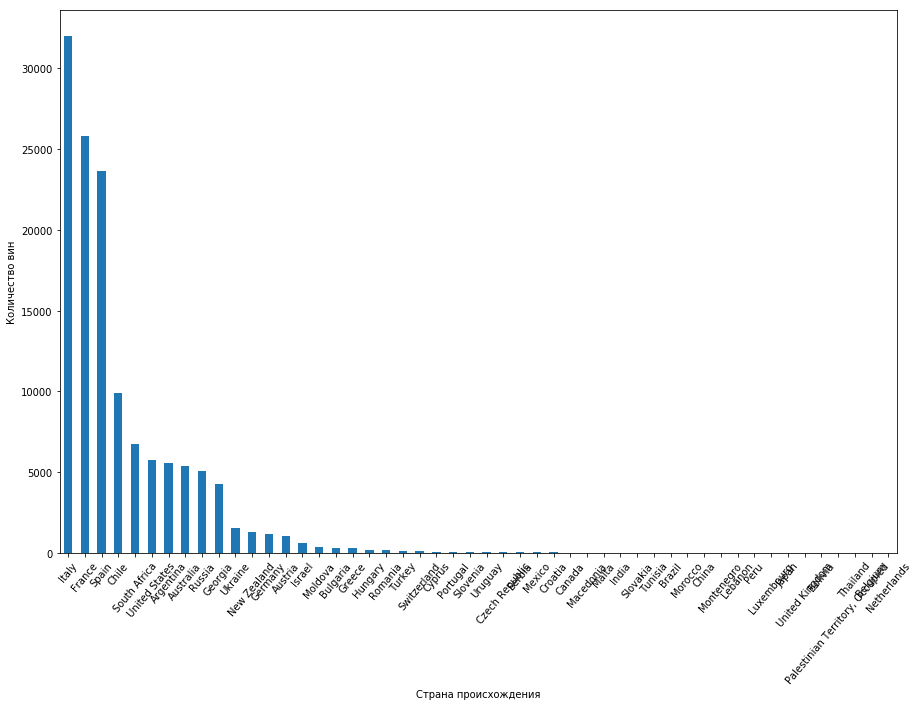

In [0]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel('Страна происхождения')
plt.ylabel('Количество вин')
plt.show()

In [0]:
text = " ".join(review for review in df_red.review)

облако слов было составлено, чтобы попробовать понять, почему модель плохо предсказывает именно красные вина

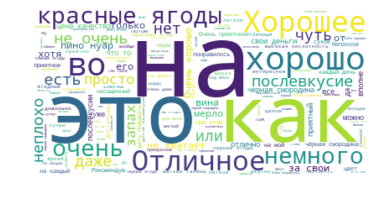

In [0]:
stopwords = set(STOPWORDS)
stopwords.update(['вино', 'пить', 'вкус', 'вкусе', 'хорошо', 'нос', 'но', 'аромат', 'аромате', 'есть', 'на', 'во', 'это', 'очень', 'хорошее' ])
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

сохраняю датасет для дальнейшей работы модели

In [0]:
df_red.to_csv('/Users/admin/BotRus/red_wines.csv', index=False, header=True)

Logistic Regression

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk import ngrams
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score

In [0]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
X = df_red['review']
y = df_red['grapes']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [0]:
vec = CountVectorizer(ngram_range=(1, 2), stop_words= stopwords.words('russian'))
bow = vec.fit_transform(x_train)

In [0]:
lr = LogisticRegression(C=2.0, random_state=42, solver = 'lbfgs', max_iter = 10000)
clf = lr.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(y_test, pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


                                                                  precision    recall  f1-score   support

                                                       Aglianico       0.56      0.12      0.20       192
                                                         Barbera       0.43      0.17      0.24       450
                                                  Cabernet Franc       0.55      0.19      0.28       274
                                          Cabernet Franc, Merlot       0.14      0.01      0.02       159
                      Cabernet Franc, Merlot, Cabernet Sauvignon       0.12      0.01      0.02       202
                                              Cabernet Sauvignon       0.23      0.37      0.29      3015
Cabernet Sauvignon, Cabernet Franc, Malbec, Merlot, Petit Verdot       0.10      0.02      0.03       283
                      Cabernet Sauvignon, Cabernet Franc, Merlot       0.19      0.17      0.18      1354
        Cabernet Sauvignon, Cabernet Franc, M

сохранение модели

In [0]:
import pickle

In [0]:
with open('modelRed.pkl', 'wb') as fout:
  pickle.dump((vec, clf), fout)

In [0]:
with open('modelRed.pkl', 'rb') as fin:
  vec, clf = pickle.load(fin)

In [0]:
X_new = vec.transform(["слива"])
clf.predict(X_new)

array(['Tempranillo'], dtype=object)

Белое вино

In [0]:
df_white = cleaned_df.loc[cleaned_df['type'] == 'White wine ']

In [0]:
df_white.shape

(53876, 10)

In [0]:
df_white.groupby(['grapes']).size().sort_values(ascending=False)

grapes
Chardonnay                                    13639
Sauvignon Blanc                               13199
Riesling                                       8028
Pinot Grigio                                   3980
Gewurztraminer                                 2104
Gruner Veltliner                               1823
Verdejo                                        1593
Chenin Blanc                                   1453
Albarino                                       1255
Cortese                                        1244
Rkatsiteli                                     1095
Sauvignon Blanc, Semillon                      1044
Vermentino                                      911
Viognier                                        790
Trebbiano                                       668
Muscat Blanc                                    531
Moscato                                         226
Saperavi                                         40
Glera (Prosecco)                                 36
Lambr

In [0]:
wines = set(df_white.grapes)

In [0]:
wines_count = {}
for wine in wines:
  wines_count[wine] = len(df_white[df_white.grapes == wine])

In [0]:
mask = np.array([False] * len(df_white))
for wine in wines_count:
  if wines_count[wine] > 650:
    mask = mask | (df_white.grapes == wine)
    
df_white = df_white[mask]

In [0]:
df_white.groupby(['grapes']).size().sort_values(ascending=False)

grapes
Chardonnay                   13639
Sauvignon Blanc              13199
Riesling                      8028
Pinot Grigio                  3980
Gewurztraminer                2104
Gruner Veltliner              1823
Verdejo                       1593
Chenin Blanc                  1453
Albarino                      1255
Cortese                       1244
Rkatsiteli                    1095
Sauvignon Blanc, Semillon     1044
Vermentino                     911
Viognier                       790
Trebbiano                      668
dtype: int64

In [0]:
df_white.to_csv('/Users/admin/BotRus/white_wines.csv', index=False, header=True)

In [0]:
X = df_white['review']
y = df_white['grapes']

In [0]:
print(X.shape, y.shape)

(52826,) (52826,)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [0]:
vec = CountVectorizer(ngram_range=(1, 2), stop_words= stopwords.words('russian'))
bow = vec.fit_transform(x_train)

In [0]:
lr = LogisticRegression(C=2.0, random_state=42, solver = 'lbfgs', max_iter = 10000)
clf = lr.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(y_test, pred))

                           precision    recall  f1-score   support

                 Albarino       0.57      0.19      0.28       313
               Chardonnay       0.45      0.68      0.54      3343
             Chenin Blanc       0.57      0.15      0.24       364
                  Cortese       0.72      0.26      0.38       319
           Gewurztraminer       0.60      0.33      0.43       551
         Gruner Veltliner       0.61      0.23      0.33       438
             Pinot Grigio       0.44      0.31      0.37       977
                 Riesling       0.62      0.58      0.60      1998
               Rkatsiteli       0.76      0.27      0.40       296
          Sauvignon Blanc       0.50      0.67      0.57      3340
Sauvignon Blanc, Semillon       0.42      0.06      0.10       259
                Trebbiano       0.35      0.04      0.07       163
                  Verdejo       0.66      0.24      0.35       404
               Vermentino       0.60      0.15      0.23     

In [0]:
with open('modelWhite.pkl', 'wb') as fout:
  pickle.dump((vec, clf), fout)

In [0]:
with open('modelWhite.pkl', 'rb') as fin:
  vec, clf = pickle.load(fin)

тест модели

In [0]:
X_new = vec.transform(["свежая трава"])
clf.predict(X_new)

array(['Sauvignon Blanc'], dtype=object)